___
# Ciência dos Dados - PROJETO 1

Eli Jose Abi Ghosn

___

## O acesso à internet para as populações de classe baixa está aumentando nas regiões brasileiras?

___
## Introdução

No mundo globalizado e tecnológico atual o acesso a internet é uma condição fundamental na vida de muitas pessoas, sendo esta a ferramenta principal nos processos produtivos, educacionais e ecônomicos da sociedade. No entanto, em 2015, mais da metade dos brasileiros de classe baixa ainda estavam excluidos dessa realidade, sem acesso a internet. Isso ocorre majoritariamente pela falta de infraestrutura para levar a conexão a áreas perifericas e pelo alto custo dos pacotes de conexão no Brasil. Por isso, esse projeto tem como objetivo analisar o aumento do acesso a internet pelas populações de classe baixa nas regiões brasileiras entre os anos de 2013, 2014 e 2015. Para isso será utilizado a base de dados da PNAD domicílio 2013, 2014 e 2015, sendo essas processadas por meio da seleção e tratramento das variáveis de interesse utilizando a biblioteca PANDAS do python.

In [901]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [902]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\elijo\Downloads


## Tratamento e seleção das variáveis dos database

In [903]:
dados3 = pd.read_csv('DOM2013.csv',sep=',')
dados4 = pd.read_csv('DOM2014.csv',sep=',')
dados5 = pd.read_csv('DOM2015.csv',sep=',')


#regiao
dados5.loc[(dados5.UF<18), 'Regiao'] = 'Norte'
dados5.loc[(dados5.UF>20) & (dados5.UF<30), 'Regiao'] = 'Nordeste'
dados5.loc[(dados5.UF>30) & (dados5.UF<36), 'Regiao'] = 'Sudeste'
dados5.loc[(dados5.UF>40) & (dados5.UF<44), 'Regiao'] = 'Sul'
dados5.loc[(dados5.UF>45), 'Regiao'] = 'Centro-Oeste'
dados5.UF = dados5.UF.astype('category')

dados5 = dados5.loc[:,['V02322', 'Regiao','V4614']]
dados5 = dados5[(dados5.V02322<=4.0)]
dados5.V02322 = dados5.V02322.astype('category')

#internet
dados5=dados5.rename(columns = {'V02322':'Internet'})
dados5.Internet.cat.categories = ('Sim','Não')

#database com todas as classes sociais
total5 = dados5.rename(columns = {'V4614':'Renda'})
total5 = total5[(total5.Renda!=999999999999)]
total5 = total5.loc[:,['Internet','Regiao','Renda']]

#renda
dados5=dados5.rename(columns = {'V4614':'Renda'})
dados5 = dados5[(dados5.Renda!=999999999999)&(dados5.Renda<=3748)]

 

dados5 = dados5.loc[:,['Internet', 'Regiao','Renda']]
print('Base de Dados de 2015')
dados5.head()


Base de Dados de 2015


,Internet,Regiao,Renda
0,Não,Norte,800.0
2,Sim,Norte,1150.0
5,Sim,Norte,1990.0
6,Não,Norte,700.0
11,Sim,Norte,2500.0


##### Para selecionar apenas os individuos da classe baixa das bases de dados foi utilizada a classificação "Classe Social pelo Critério por Faixas de Salário-Mínimo" do IBGE, considerando as classes D e E como integrantes da classe baixa. Assim, integrantes com uma renda mensal domiciliar  menor de 3748 reais foram selecionados como classe baixa.

In [904]:
#regiao
dados4.loc[(dados4.UF<18), 'Regiao'] = 'Norte'
dados4.loc[(dados4.UF>20) & (dados4.UF<30), 'Regiao'] = 'Nordeste'
dados4.loc[(dados4.UF>30) & (dados4.UF<36), 'Regiao'] = 'Sudeste'
dados4.loc[(dados4.UF>40) & (dados4.UF<44), 'Regiao'] = 'Sul'
dados4.loc[(dados4.UF>45), 'Regiao'] = 'Centro-Oeste'
dados4.UF = dados4.UF.astype('category')

dados4 = dados4.loc[:,['V02322', 'Regiao','V4614']]
dados4 = dados4[(dados4.V02322<=4.0)]
dados4.V02322 = dados4.V02322.astype('category')

#internet
dados4=dados4.rename(columns = {'V02322':'Internet'})
dados4.Internet.cat.categories = ('Sim','Não')

#database com todas as classes sociais
total4 = dados4.rename(columns = {'V4614':'Renda'})
total4 = total4[(total4.Renda!=999999999999)]
total4 = total4.loc[:,['Internet', 'Regiao','Renda']]

#renda
dados4=dados4.rename(columns = {'V4614':'Renda'})
dados4 = dados4[(dados4.Renda!=999999999999)&(dados4.Renda<=3748)]

dados4 = dados4.loc[:,['Internet', 'Regiao','Renda']]
print('Base de Dados de 2014')

dados4.head()

Base de Dados de 2014


,Internet,Regiao,Renda
0,Não,Norte,1500.0
1,Sim,Norte,2300.0
2,Não,Norte,724.0
4,Sim,Norte,3422.0
5,Não,Norte,1700.0


In [905]:
#regiao
dados3.loc[(dados3.UF<18), 'Regiao'] = 'Norte'
dados3.loc[(dados3.UF>20) & (dados3.UF<30), 'Regiao'] = 'Nordeste'
dados3.loc[(dados3.UF>30) & (dados3.UF<36), 'Regiao'] = 'Sudeste'
dados3.loc[(dados3.UF>40) & (dados3.UF<44), 'Regiao'] = 'Sul'
dados3.loc[(dados3.UF>45), 'Regiao'] = 'Centro-Oeste'
dados3.UF = dados3.UF.astype('category')

dados3 = dados3.loc[:,['V02322','V4105', 'Regiao','V4614']]
dados3 = dados3[(dados3.V02322<=4.0)]
dados3.V02322 = dados3.V02322.astype('category')

#zona
dados3.loc[(dados3.V4105<4),'Zona'] = 'Urbana'
dados3.loc[(dados3.V4105>3),'Zona'] = 'Rural'
dados3.Zona = dados3.Zona.astype('category')

#internet
dados3=dados3.rename(columns = {'V02322':'Internet'})
dados3.Internet.cat.categories = ('Sim','Não')

#database com todas as classes sociais
total3 = dados3.rename(columns = {'V4614':'Renda'})
total3 = total3[(total3.Renda!=999999999999)]
total3 = total3.loc[:,['Internet','Zona', 'Regiao','Renda']]

#renda
dados3=dados3.rename(columns = {'V4614':'Renda'})
dados3 = dados3[(dados3.Renda!=999999999999)&(dados3.Renda<=3748)]

dados3 = dados3.loc[:,['Internet','Zona', 'Regiao','Renda']]
print('Base de Dados de 2013')
dados3.head()

Base de Dados de 2013


,Internet,Zona,Regiao,Renda
2,Não,Urbana,Norte,350.0
3,Não,Urbana,Norte,678.0
4,Não,Urbana,Norte,800.0
5,Não,Urbana,Norte,800.0
6,Não,Urbana,Norte,1234.0


___
## Análise e Resultados

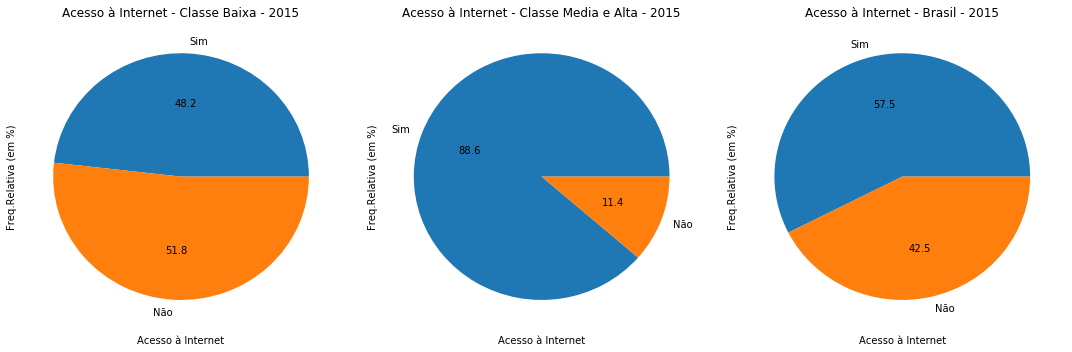

In [906]:
g5 = (dados5.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)
g4 = (dados4.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)
g3 = (dados3.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)

#toda a população
t5 = (total5.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)
t4 = (total4.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)
t3 = (total3.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)

#classes media e alta
c5 = (total5.Internet[total5.Renda>=3749].value_counts(sort=False, normalize=True)*100).round(decimals=1)
c4 = (total4.Internet[total4.Renda>=3749].value_counts(sort=False, normalize=True)*100).round(decimals=1)
c3 = (total3.Internet[total3.Renda>=3749].value_counts(sort=False, normalize=True)*100).round(decimals=1)

#Comparacao do acesso a internet pelas classes baixas e por toda a populacao 
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = g5.plot(kind='pie',title='Acesso à Internet - Classe Baixa - 2015', autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso à Internet')


plt.subplot(132)
plot = c5.plot(kind='pie',title='Acesso à Internet - Classe Media e Alta - 2015', autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso à Internet')

plt.subplot(133)
plot = t5.plot(kind='pie',title='Acesso à Internet - Brasil - 2015', autopct='%.1f')
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Acesso à Internet')


plt.tight_layout()
plt.show()


###### Como é possível observar pelos gráficos acima, mais de 50% da população de classe baixa no Brasil ainda não tem acesso à internet. No entanto, para a classe média e alta esse numero é menor do que 12%, e para o Brasil, é de 42,5%,  expondo um grande problema no que se refere a democratização do acesso à internet no Brasil.

Evolução do acesso a Internet no Brasil entre 2013 e 2015:


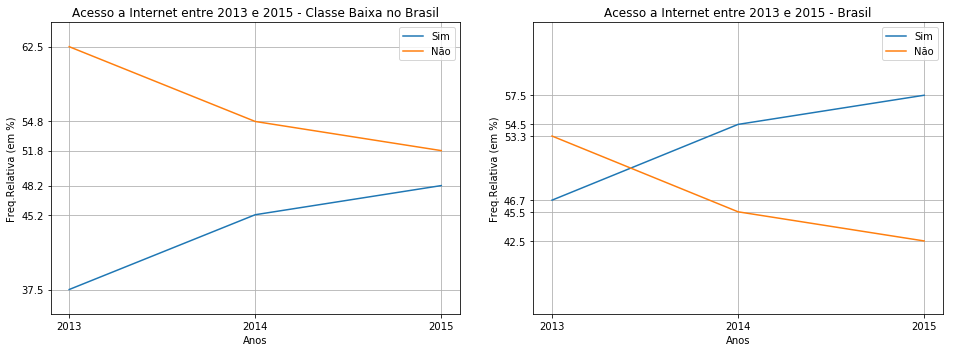

In [907]:
lista1 = [g3,g4,g5]
lista2 = [t3,t4,t5]
anos = ['2013','2014','2015']

#classe baixa
fig = plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(anos,lista1)
plt.xticks([2013,2014,2015])
plt.yticks([37.5,45.2,48.2,51.8,54.8,62.5])
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Anos')
plt.legend(['Sim','Não'])
plt.title('Acesso a Internet entre 2013 e 2015 - Classe Baixa no Brasil')
plt.ylim((35,65))
plt.grid()
print('Evolução do acesso a Internet no Brasil entre 2013 e 2015:')

#brasil inteiro
plt.subplot(132)
plt.plot(anos,lista2)
plt.xticks([2013,2014,2015])
plt.yticks([42.5,45.5,46.7,53.3,54.5,57.5])
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Anos')
plt.legend(['Sim','Não'])
plt.title('Acesso a Internet entre 2013 e 2015 - Brasil')
plt.ylim((35,65))

plt.tight_layout()
plt.grid()
plt.show()

######  Comparando a evolução do acesso à internet entre as classes baixas e a população total é possível notar que o crescimento do primeiro ao longo dos três anos, de 10,7 pontos percentuais, é semelhante ao do conjunto total, de 10,8 pontos percentuais. Desse modo, apesar de estar menos conectada que o conjunto total, a classe baixa apresenta uma evolução adequada nesse fator quando comparada com o crescimento geral.

Acesso à Internet por Região do Brasil - Classe Baixa


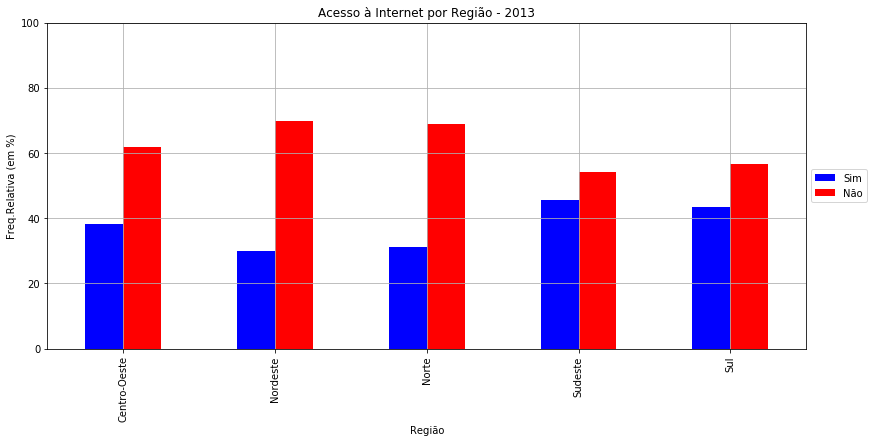

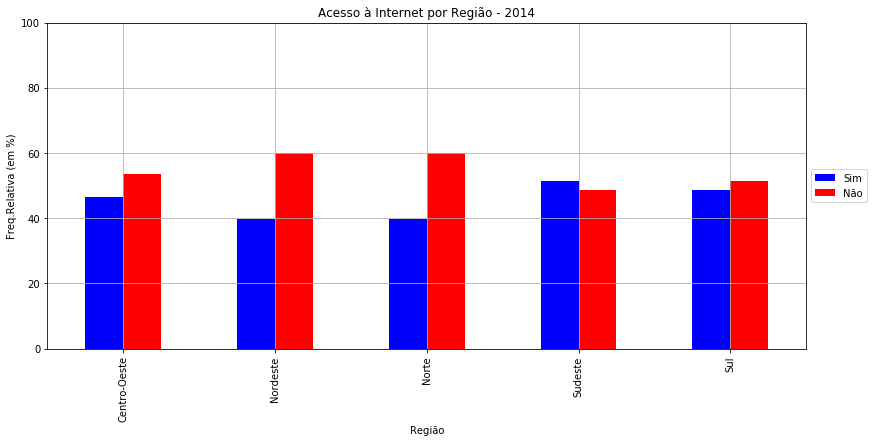

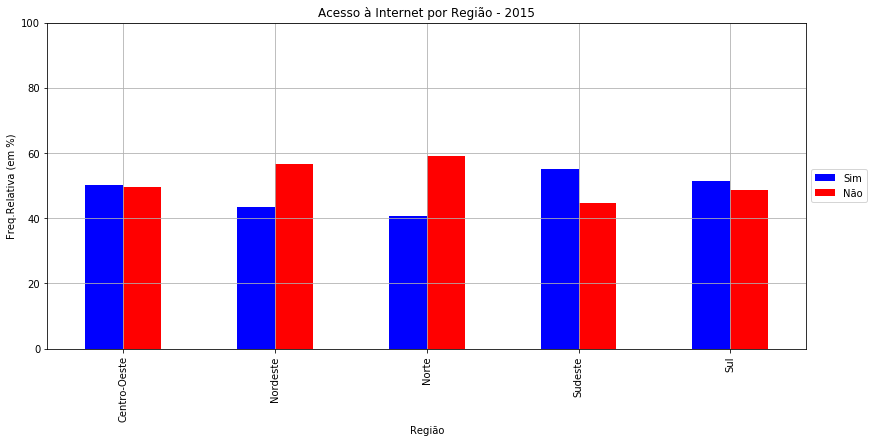

In [908]:
#crosstab Regioes e Acesso a Internet
ct3=(pd.crosstab(dados3.Regiao, dados3.Internet, margins=True, rownames=['Região'], colnames=['Acesso à Internet'], normalize='index')*100).round(decimals=1)
plot = ct3.iloc[0:5,].plot(kind='bar', title='Acesso à Internet por Região - 2013', figsize=(17, 6), color=('b','r') )
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Região')
plt.ylim((0,100))
plt.grid()


ct4=(pd.crosstab(dados4.Regiao, dados4.Internet, margins=True, rownames=['Região'], colnames=['Acesso à Internet'], normalize='index')*100).round(decimals=1)
plot = ct4.iloc[0:5,].plot(kind='bar', title='Acesso à Internet por Região - 2014', figsize=(17, 6), color=('b','r') )
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Região')
plt.ylim((0,100))
plt.grid()


ct5=(pd.crosstab(dados5.Regiao, dados5.Internet, margins=True, rownames=['Região'], colnames=['Acesso à Internet'], normalize='index')*100).round(decimals=1)
plot = ct5.iloc[0:5,].plot(kind='bar', title='Acesso à Internet por Região - 2015', figsize=(17, 6), color=('b','r') )
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Região')
plt.ylim((0,100))
plt.grid()

print('Acesso à Internet por Região do Brasil - Classe Baixa')
plt.show()


###### Analisando os gráficos acima é possível perceber que as duas piores regiões quanto ao acesso à internet são o Norte e o Nordeste. Sua evolução será analisada mais a fundo nos gráficos a seguir. Além disso, as regiões Sul e Sudeste são as mais conectadas, tendo mais de 50% de sua população com acesso à internet.

In [909]:
#brasil
b3 = (dados3.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)
b4 = (dados4.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)
b5 = (dados5.Internet.value_counts(sort=False, normalize=True)*100).round(decimals=1)

#nordeste
ut3 = (dados3.Internet[dados3.Regiao=='Nordeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut4 = (dados4.Internet[dados4.Regiao=='Nordeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut5 = (dados5.Internet[dados5.Regiao=='Nordeste'].value_counts(sort=False, normalize=True)*100).round(decimals=1)

#norte
n3 = (dados3.Internet[dados3.Regiao=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
n4 = (dados4.Internet[dados4.Regiao=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
n5 = (dados5.Internet[dados5.Regiao=='Norte'].value_counts(sort=False, normalize=True)*100).round(decimals=1)


Evolução do acesso à Internet no Brasil entre 2013 e 2015:


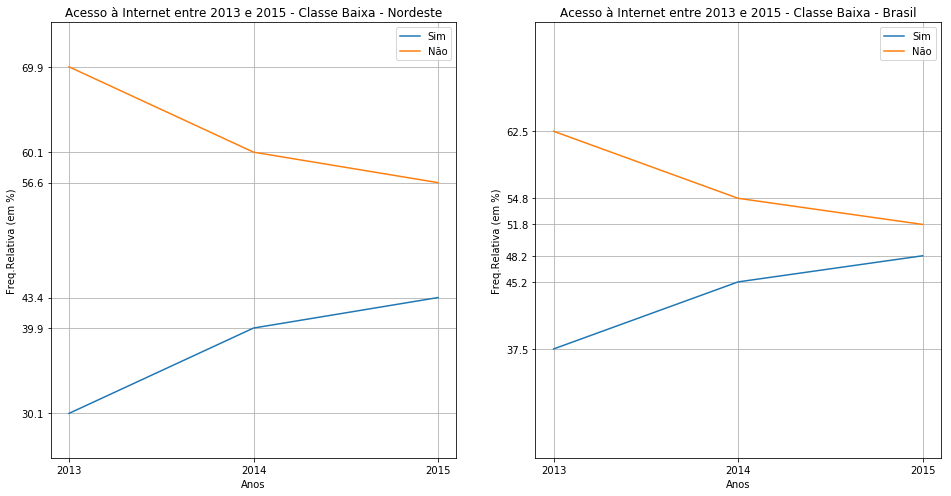

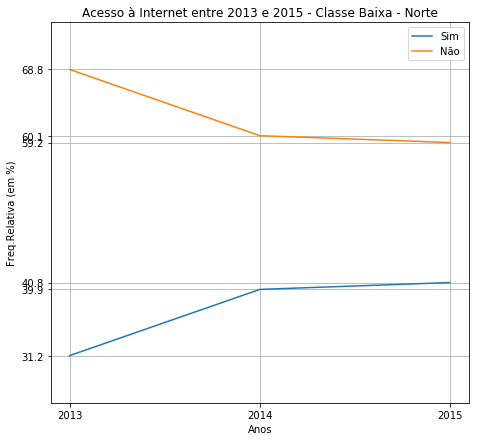

In [910]:
lista1 = [ut3,ut4,ut5]
lista2 = [b3,b4,b5]
lista3 = [n3,n4,n5]
anos = ['2013','2014','2015']

#Nordeste
fig = plt.figure(figsize=(20, 7))
plt.subplot(131)
plt.plot(anos,lista1)
plt.xticks([2013,2014,2015])
plt.yticks([69.9,60.1,56.6,30.1,39.9,43.4])
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Anos')
plt.legend(['Sim','Não'])
plt.title('Acesso à Internet entre 2013 e 2015 - Classe Baixa - Nordeste')
plt.ylim((25,75))
plt.grid()
print('Evolução do acesso à Internet no Brasil entre 2013 e 2015:')



#brasil inteiro
plt.subplot(132)
plt.plot(anos,lista2)
plt.xticks([2013,2014,2015])
plt.yticks([37.5,62.5,45.2,54.8,48.2,51.8])
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Anos')
plt.legend(['Sim','Não'])
plt.title('Acesso à Internet entre 2013 e 2015 - Classe Baixa - Brasil')
plt.ylim((25,75))

plt.tight_layout()
plt.grid()
plt.show()

#Norte
plt.figure(figsize=(7.5,7))
plt.plot(anos,lista3)
plt.xticks([2013,2014,2015])
plt.yticks([31.2,68.8,39.9,40.8,59.2,60.1])
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Anos')
plt.legend(['Sim','Não'])
plt.title('Acesso à Internet entre 2013 e 2015 - Classe Baixa - Norte')
plt.ylim((25,75))
plt.grid()


plt.show()

######   Comparando agora a evolução do acesso à internet as classes baixas no Nordeste e no Brasil inteiro é possível perceber que a região com a segunda pior conectividade apresentou um crescimento de 13.3 pontos percentuais, maior do que a média nacional, de 10,7 pontos percentuais, no anos analisados e ultrapassou o Norte nesse fator. Entretanto, os regiões do Nordeste juntamente com o Norte foram os únicos que se mantiveram abaixo da média nacional de 48.2 % das pessoas com acesso à internet. Além disso, em relação ao Norte, houve uma melhora considerável entre 2013 e 2014, porém no ano seguinte os ganhos no acesso à internet foram quase nulos, aumentando em 0,9 pontos percentuais. Assim, a região Norte passou a ocupar o posto de pior conectividade nacional, com um crescimento nesses três anos de 9,6  pontos percentuais, abaixo da média nacional.


___
## Conclusão 